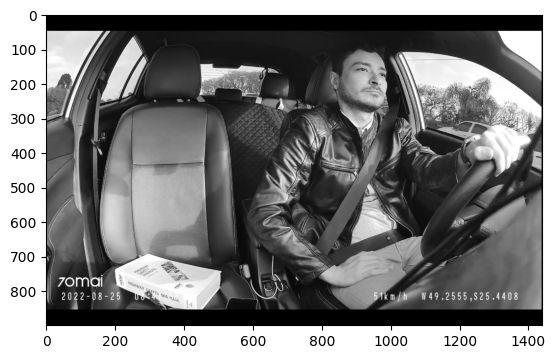

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('imagemIC.png', cv2.IMREAD_GRAYSCALE)

M = np.array([[1,1,1], [1, 1, 1], [1,1,1]]) *(1/9)
output=cv2.filter2D(img,-1,M)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR))
# plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

In [ ]:
from IPython.display import clear_output
import ipywidgets as widgets
# código para exibir a imagem

plt.show(block=False)
clear_output(wait=True)

img = cv2.imread('imagemIC.png')


def display_image(threshold=127):
    global img  # make sure to use the global image variable
    plt.clf()
    plt.close('all')
    clear_output(wait=False)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    plt.imshow(binary, cmap="gray")


display_image()

slider = widgets.IntSlider(min=0, max=255, step=1, value=127)


def on_value_change(change):
    display_image(change.new)
    display(slider)


slider.observe(on_value_change, names='value', type='change')

display(slider)


In [ ]:
# #Sharpening

# plt.show(block=False)
# clear_output(wait=True)
    
# M = np.array([[0,0,0], [0,2,0], [0,0,0]]) - 1/9*np.array([[1,1,1], [1,1,1], [1,1,1]])

# kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# def display_image()
#     global img
#     plt.clf()
#     plt.close('all')
#     clear_output(wait=False)
#     _, output = cv2.filter2D(img, -1, kernel)
#     plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

# output=cv2.filter2D(img,-1,kernel)

# plt.imshow(cv2.cvtColor(output, cv2.COLOR_GRAY2BGR))

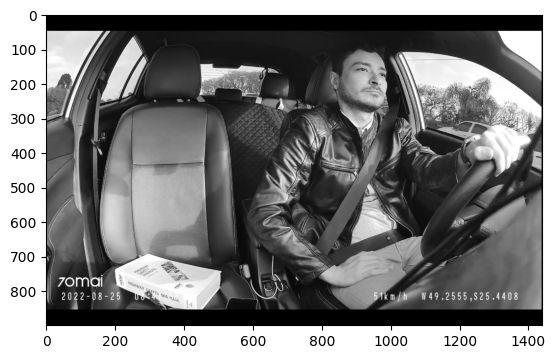

In [16]:
#Subtract do sharpness
# sub=cv2.subtract(img,output)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_GRAY2BGR))

IntSlider(value=7, max=31, min=1, step=2)

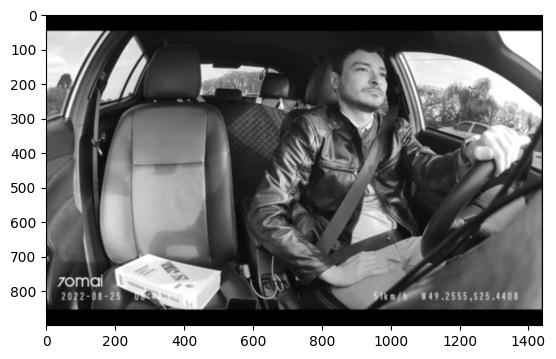

In [ ]:
blur = cv2.GaussianBlur(img,(11,11),0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_GRAY2BGR))

plt.show(block=False)
clear_output(wait=True)

def display_image(blur=11):
    global img
    plt.clf()
    plt.close('all')
    clear_output(wait=False)
    blur = cv2.GaussianBlur(img,(blur,blur),0)
    plt.imshow(cv2.cvtColor(blur, cv2.COLOR_GRAY2BGR))

display_image()

slider = widgets.IntSlider(min=1, max=31, step=2, value=11)

def on_value_change(change):
    display_image(change.new)
    display(slider)

slider.observe(on_value_change, names='value', type='change')

display(slider)

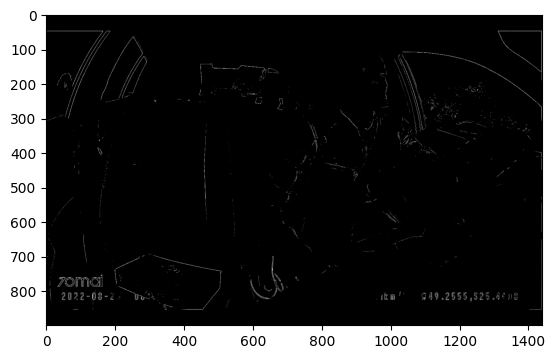

In [29]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(np.square(sobelx) + np.square(sobely))

# Cria uma máscara para manter apenas os pixels que representam as bordas
mask = np.uint8(sobel > np.mean(sobel) * 10)

# Aplica a máscara na imagem
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Exibe apenas as bordas
plt.imshow(masked_img, cmap='gray')

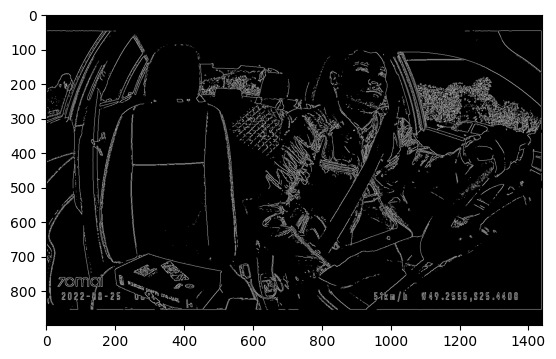

In [28]:
# Canny para detecção de bordas
edges = cv2.Canny(img, 200, 200)
plt.imshow(edges,cmap="gray")

In [ ]:
#Filtro laplaciano
laplacian = cv2.Laplacian(img, cv2.CV_8U)

plt.imshow(laplacian,cmap="gray")

In [ ]:
x = 760
y = 20
w = 300
h = 300
roi = img[y:y+h, x:x+w]
blurred_img=img[:]
ksize = (77, 77)
sigma = 0
blurred_roi = cv2.GaussianBlur(roi, ksize, sigma)

blurred_img[y:y+h, x:x+w] = blurred_roi

plt.imshow(blurred_img, cmap="gray")


In [ ]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);

In [ ]:
from __future__ import print_function
from __future__ import division

alpha_slider_max = 100
title_window = 'Linear Blend'
def on_trackbar(val):
    alpha = val / alpha_slider_max
    beta = ( 1.0 - alpha )
    dst = cv2.addWeighted(src1, alpha, src2, beta, 0.0)
    cv2.imshow(title_window, dst)

src1 = cv2.imread("blur.png")
src2 = cv2.imread("mask.png")

cv2.namedWindow(title_window)
trackbar_name = 'Alpha x %d' % alpha_slider_max
cv2.createTrackbar(trackbar_name, title_window , 0, alpha_slider_max, on_trackbar)
# Show some stuff
on_trackbar(0)
# Wait until user press some key
cv2.waitKey()